In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from functions import *

In [2]:
os.getcwd()

'c:\\Users\\USER\\Desktop\\컴퓨터비전개론\\Excercise1'

In [3]:
img = cv2.imread("Sample Images/shapes.png", cv2.IMREAD_GRAYSCALE)

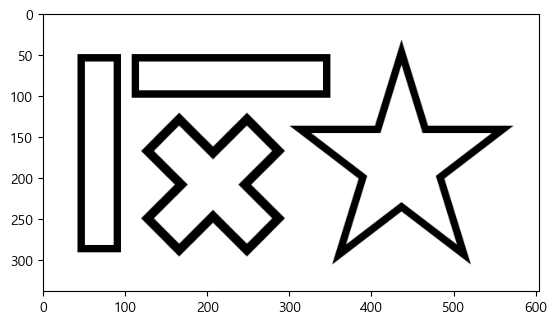

In [4]:
plt.imshow(img, cmap="gray")
plt.show()

#### Part3. Corner Detection

3-1. Apply the Gaussian filtering to the input image.

In [5]:
kernel = get_gaussian_filter_2d(size=7, sigma=1.5)
filtered_img = cross_correlation_2d(img, kernel=kernel)

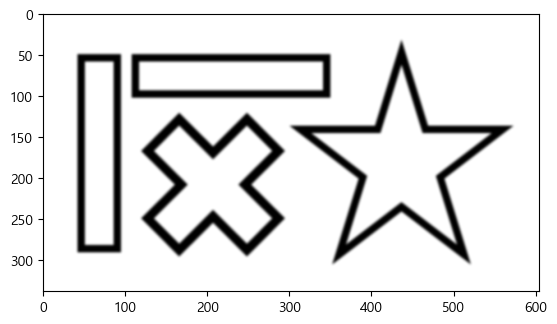

In [6]:
plt.imshow(filtered_img, cmap="gray")
plt.show()

3-2. Implement a function that returns corner response values:

In [7]:
def compute_corner_response(img):

    # (a) First apply the Sobel filters to compute derivatives along x and y directions
    sobel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
    sobel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])
    I_x = cross_correlation_2d(img, sobel_x)
    I_y = cross_correlation_2d(img, sobel_y)

    # (b) For each pixel, compute the second moment matrix 𝑀. You can utilize an uniform window
    # function (i.e. 𝑤(𝑥, 𝑦) = 1 if (𝑥, 𝑦) is lying in the window, otherwise 𝑤(𝑥, 𝑦) = 0).
    # Use 5 × 5 window to compute the matrix.
    Ix_2 = np.multiply(I_x, I_x)
    Iy_2 = np.multiply(I_y, I_y)
    IxIy = np.multiply(I_x, I_y)

    # 이미지에 window를 겹쳐가면서 covariance matrix를 계산하고, 고유값을 구한다
    window = 5
    window_filter = np.ones((window, window))
    cov_xx = cross_correlation_2d(Ix_2, window_filter)
    cov_yy = cross_correlation_2d(Iy_2, window_filter)
    cov_xy = cross_correlation_2d(IxIy, window_filter)

    k = 0.04
    detM = cov_xx * cov_yy - cov_xy ** 2
    trace = cov_xx + cov_yy
    R = (detM) - k * (trace ** 2)

    # (d) Once the response values for all the pixels are computed, update all the negative responses to 0 
    # and then normalize them to a range of [0,1].
    R[R < 0] = 0
    R = (R - np.min(R)) / (np.max(R) - np.min(R))
    return R

In [8]:
R = compute_corner_response(filtered_img)

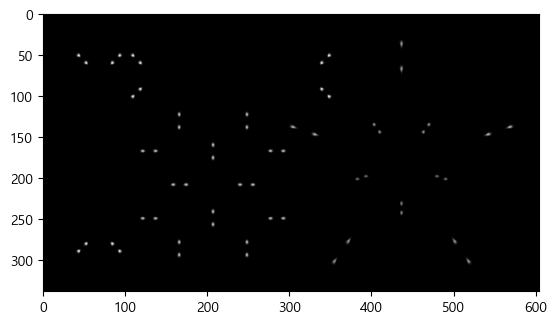

In [9]:
plt.imshow(R, cmap="gray")
plt.show()

#### 3-3. Thresholding and Non-maximum Suppression (NMS):

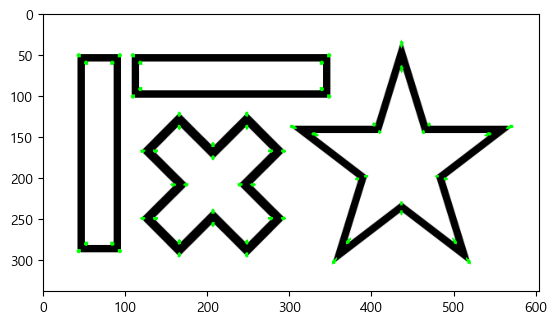

In [10]:
# (a) Change the color of pixels having corner response greater than a threshold of 0.1 to green
# (b) Display the result of (a) and store it as an image file ‘./result/part_3_corner_bin_ INPUT_IMAGE_FILE_NAME’

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_color[R > 0.1] = [0, 255, 0]
plt.imshow(img_color)
plt.show()

In [11]:
# # (c) Implement a function that compute local maximas by non-maximum suppression:
# This function suppresses (i.e. set to 0) the corner response at a position (𝑥, 𝑦)
# if it is not a maximum value within a squared window sized winSize and centered at (𝑥, 𝑦). 
# Althogh the response is a local maxima, it is suppressed if it not greater than
# the threshold 0.1. Set the parameter winSize = 11.


def non_maximum_suppresion_win(R, winSize):
    winSide = winSize // 2
    nms_R = np.zeros(R.shape)

    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            now = R[i, j]
            if now <= 0.1:
                continue
            window = R[max(i-winSide, 0) : min(i+winSide+1, R.shape[0]), 
                       max(j-winSide, 0) : min(j+winSide+1, R.shape[1])]
            if now == window.max():
                nms_R[i, j] = 1

    return nms_R

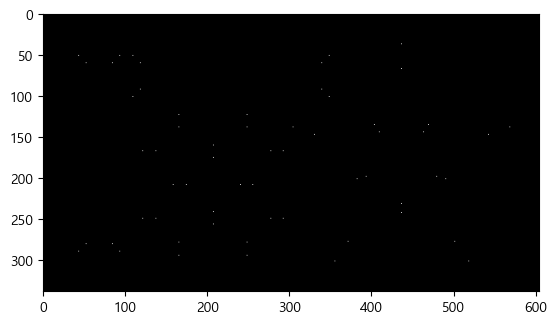

In [12]:
winSize = 11
R_nms = non_maximum_suppresion_win(R, winSize=winSize)
plt.imshow(R_nms, cmap="gray")
plt.show()

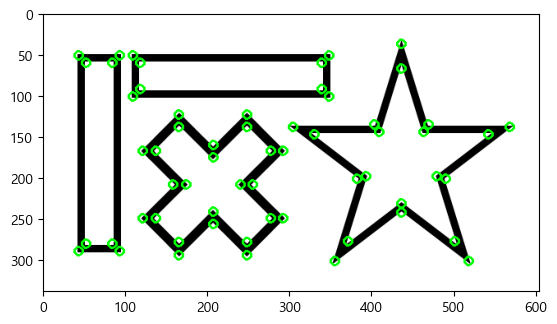

In [16]:
img_suppressed = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for i in range(R_nms.shape[0]):
        for j in range(R_nms.shape[1]):
            if R_nms[i, j] == 1.0:
                img_suppressed = cv2.circle(img_suppressed, (j, i), 5, (0, 255, 0), 2)

plt.imshow(img_suppressed)
plt.show()